# Sigrid Juselius 2022

In [3]:
'''

If SAVE_FILES set to True, the script will generate processed data files and plots.
False by default.

If VERBOSE set to True, the script will output additional information.
False by default.
'''
SAVE_FILES = False
VERBOSE = False

## Import packages and set data folders 

In [4]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import sys
import pickle as pkl

In [5]:
DATASET_PATH = "/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON/"
SCRIPTS_PATH = "/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/"
%cd {DATASET_PATH}
%pwd

/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON


'/Users/artemii/obrain_lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

## Data Cleaning

In [6]:
meta_data = pd.read_csv("META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
meta_data.head()

,Unnamed: 0,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No


In [7]:
anthropometry = pd.read_csv("Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv")
anthropometry["BMI"] = anthropometry["Weight_kg"]/((anthropometry["Height_cm"]/100)**2)
anthropometry.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
count,228.000000,228.000000,227.000000,227.000000,228.000000
mean,174.759211,74.099079,84.362115,95.362996,24.232279
std,10.236729,13.054842,12.049521,9.958975,3.634442
min,145.000000,48.000000,60.000000,70.000000,17.930787
25%,167.425000,64.250000,75.800000,89.250000,21.545560
50%,175.000000,72.850000,83.000000,95.000000,23.664355
75%,182.825000,82.650000,92.000000,101.000000,26.076901
max,199.500000,113.900000,127.000000,126.000000,36.649262


<AxesSubplot:>

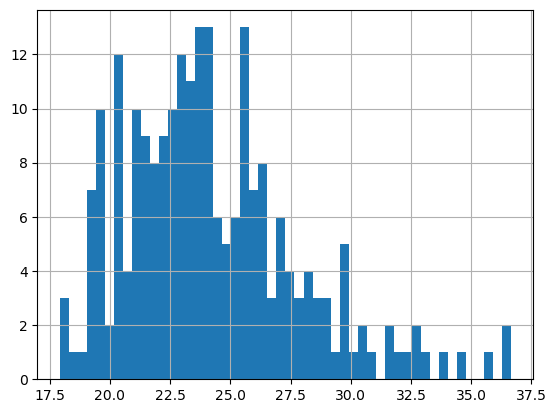

In [8]:
anthropometry["BMI"].hist(bins=50)

In [9]:
anthropometry

,Unnamed: 0,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
0,sub-032301,162.0,78.00,97.0,111.0,29.721079
1,sub-032302,164.5,64.30,70.0,102.0,23.761791
2,sub-032303,166.5,101.60,113.0,123.0,36.649262
3,sub-032304,184.6,87.60,95.0,93.5,25.706368
4,sub-032305,171.5,71.19,83.0,107.0,24.204201
...,...,...,...,...,...,...
223,sub-032524,182.2,69.70,75.5,98.0,20.995974
224,sub-032525,175.8,72.50,75.6,85.0,23.458501
225,sub-032526,186.2,90.40,93.0,107.0,26.074085
226,sub-032527,192.1,87.40,84.0,91.0,23.684090


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [11]:
cognitive_tests_path = "Cognitive_Test_Battery_LEMON"
emotion_personality_tests_path = "Emotion_and_Personality_Test_Battery_LEMON"
cognitive_tests_folders = os.listdir(cognitive_tests_path)
for i in cognitive_tests_folders:
    if i == '.DS_Store':
        cognitive_tests_folders.remove(i)
cognitive_tests_path_full = [os.path.join(cognitive_tests_path, s) for s in cognitive_tests_folders]
tests_path_full = cognitive_tests_path_full + [emotion_personality_tests_path]
df_list = []
for folder in tests_path_full:
    for file in os.listdir(folder):
        if '.' in file:
            if file.split('.')[1] == 'csv':
                filepath = os.path.join(folder, file)
                df_list.append(pd.read_csv(filepath))

data = anthropometry
data = data.rename(columns={'Unnamed: 0':'id'}).set_index('id')
count = 0
for dataset in df_list:
    dataset = dataset.rename(columns={'Unnamed: 0':'id'})
    data = data.join(dataset.set_index('id'))
    count += 1

In [12]:
if VERBOSE:
    data.head()

In [13]:
if VERBOSE:
    data.info(verbose=True)

In [14]:
if VERBOSE:
    data._get_numeric_data().info(verbose=True, null_counts=True)

In [15]:
data_num = data._get_numeric_data()

In [16]:
if VERBOSE:
    [data.shape, data_num.shape]

In [17]:
# Replace NAs with medians

for col in data_num.columns:
    median = data_num[col].median()
    data_num[col].fillna(median, inplace=True)

data_num.shape

(228, 219)

In [18]:
if VERBOSE:
    data_num.describe()

## Principal Component Analysis

### Scale data for PCA

In [87]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(data_num)

X.shape

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(228, 219)

In [88]:
data_num_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

### Remove null and non-number values

In [19]:
if VERBOSE:
    data_num_tr.describe()

In [20]:
if VERBOSE:
    data_num_tr.info(verbose=True, null_counts=True)

In [91]:
data_num_tr.drop(columns=['YFAS_control', 'YFAS_attempts', 'YFAS_time',
                         'YFAS_activities', 'YFAS_problems', 'YFAS_tolerance',
                         'YFAS_withdrawal', 'YFAS_impairment', 'YFAS_symptom_count',
                         'YFAS_diagnosis', 'Unnamed: 32'], inplace=True)

In [21]:
if VERBOSE:
    data_num_tr.info(verbose=True, null_counts=True)

In [ ]:
# Had to install plotly through conda as it didn't work through pip

# !conda install --yes --prefix {'/opt/homebrew/opt/python@3.9/Frameworks/Python.framework/Versions/3.9'} plotly



In [ ]:
sys.prefix

### Reduce and Plot

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(data_num_tr)
fig = px.scatter_matrix(components,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [ ]:
dir(px.colors.sequential)

In [ ]:
pip install -U kaleido

In [ ]:
import plotly.io as pio
pio.kaleido.scope.default_width = 1200
pio.kaleido.scope.default_height = 700

if SAVE_FILES:
    os.makedirs("plots", exist_ok=True)
    fig.write_image('plots/mind-brain-body-pca-waist.svg')

In [ ]:
pca.n_features_

In [ ]:
pca.explained_variance_ratio_

### Important Features

In [ ]:
relevant_features = pd.DataFrame(abs(pca.components_), columns=data_num_tr.columns, index=['PC1', 'PC2'])

In [ ]:
relevant_features

In [ ]:
relevant_features.idxmax(axis=1)

In [ ]:
relevant_features_pc1_sorted = relevant_features.transpose().sort_values('PC1', ascending=False)
relevant_features_pc1_sorted.head(20)

In [ ]:
relevant_features_pc2_sorted = relevant_features.transpose().sort_values('PC2', ascending=False)
relevant_features_pc2_sorted.head(20)

In [ ]:
if SAVE_FILES:
    os.makedirs("processed_data", exist_ok=True)
    relevant_features_pc1_sorted.to_csv('processed_data/relevant_features_pc1_sorted.csv')
    relevant_features_pc2_sorted.to_csv('processed_data/relevant_features_pc2_sorted.csv')

In [ ]:
fig

In [ ]:
sys.version

In [ ]:
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/
DATA_FOLDER = '/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

### PCA to explain 95% variance

In [ ]:
pca95 = PCA(n_components=0.95)

components95 = pca95.fit_transform(data_num_tr)
fig = px.scatter_matrix(components95[:,:2],
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [ ]:
pca95.explained_variance_ratio_

In [ ]:
print("Number of dimensions needed to explain 95% of variance is " + str(len(pca95.explained_variance_ratio_)))

### PCA with no Anthropometry

In [27]:
data_num_tr_nobmi = data_num_tr.copy()
data_num_tr_nobmi = data_num_tr_nobmi.drop(['BMI', 'Waist_cm', 'Height_cm', 'Weight_kg', 'Hip_cm'], axis=1)

NameError: name 'data_num_tr' is not defined

In [ ]:
pca_nobmi = PCA(n_components=2)
components_nobmi = pca_nobmi.fit_transform(data_num_tr_nobmi)
fig = px.scatter_matrix(components_nobmi,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [ ]:
# Plotting functions for BGM from HOML Book

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### Visualize relevant values

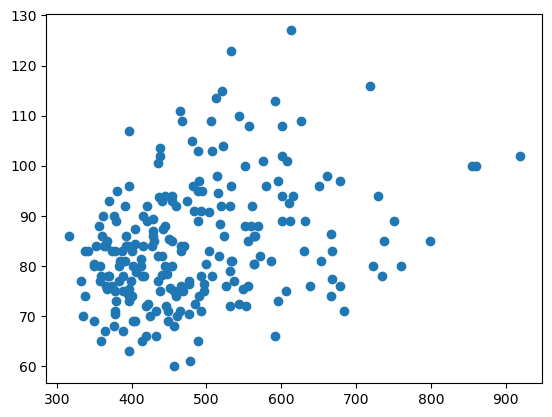

In [24]:
plt.scatter(data_num["TAP_I_8"], data_num["Waist_cm"])

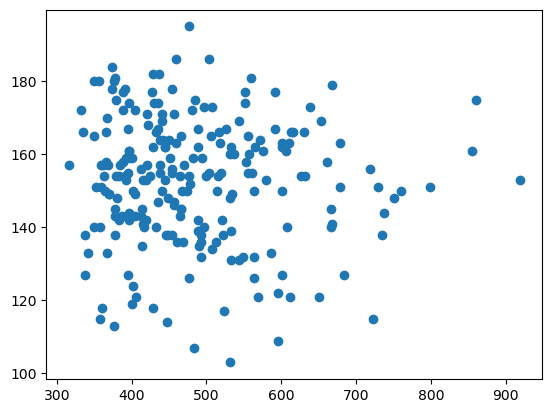

In [25]:
plt.scatter(data_num["TAP_I_8"], data_num["TeiQueSF_total"])

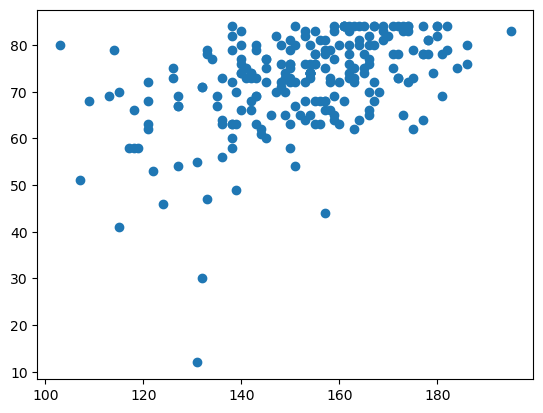

In [26]:
plt.scatter(data_num["TeiQueSF_total"], data_num["MSPSS_total"])

In [29]:
%cd {SCRIPTS_PATH}

/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


## Clustering PCA no BMI/waist cm

In [35]:
# This code was used for analysis demonstrated in the proposal
# Don't fit a new model, use the saved one
NEW_MODEL = False

In [25]:
from sklearn.mixture import BayesianGaussianMixture
n_components = 10

bgm_on_pca_nobmi = BayesianGaussianMixture(n_components=n_components,
                                           n_init=20,
                                           covariance_type="full",
                                           weight_concentration_prior=10000,
                                           init_params="k-means++",
                                           random_state=44)

In [36]:
if NEW_MODEL:
    bgm_on_pca_nobmi.fit(components_nobmi)
    cluster_list = list(zip(range(n_components), bgm_on_pca_nobmi.weights_))

In [ ]:
# Clusters and centroid coordinates
list(zip(cluster_list, bgm_on_pca_nobmi.means_))

In [ ]:
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 0, 3, 8, 1 
fig

#### Dump models and save data

In [ ]:
%cd 

if SAVE_FILES:
    pkl.dump(bgm_on_pca_nobmi, open('processed_data/bgm_on_pca_nobmi.mdl', 'wb'))
    np.save('processed_data/components_nobmi.npy', components_nobmi)
    data_num.to_csv('processed_data/behavioural_numerical_data.csv')
    bgm_cluster_on_pca_nobmi = bgm_on_pca_nobmi.predict(components_nobmi)
    data_bgm_clustered_on_pca_nobmi = data_num.copy()
    data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] = bgm_cluster_on_pca_nobmi
    data_bgm_clustered_on_pca_nobmi.to_csv("processed_data/clustered_behavioral_LEMON_pca_based_nobmi.csv")

# Plotting functions for behavioural clustering

## Import libraries and data

In [623]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd
import plotly.express as px
import sys
import pickle as pkl

In [624]:
%cd {SCRIPTS_PATH}

bgm_on_pca_nobmi = pkl.load(open('processed_data/bgm_on_pca_nobmi.mdl', 'rb'))
components_nobmi = np.load('processed_data/components_nobmi.npy')
data_num = pd.read_csv('processed_data/behavioural_numerical_data.csv')

/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


## Colour scheme

In [625]:
color_list_subtle = ['steelblue',
                     'wheat',
                     'coral']

color_list_detailed = ['darkblue',
                       'skyblue',
                       'darkorange',
                       'orangered']

color_list_very_detailed = ['darkblue',
                            'skyblue',
                            'olivedrab',
                            'gold',
                            'orangered']

cmap_subtle = colors.LinearSegmentedColormap.from_list('juselius22_subtle', color_list_subtle)
cmap_detailed = colors.LinearSegmentedColormap.from_list('juselius22_detailed', color_list_detailed)
cmap_very_detailed = colors.LinearSegmentedColormap.from_list('juselius22_very_detailed', color_list_very_detailed)

## Fonts

In [626]:
from matplotlib.font_manager import FontProperties, FontManager
# ?
# mgr = FontManager()
# mgr.get_font_names()

In [627]:
font = FontProperties()
font.set_name('Helvetica')

### Show default rcParams

In [23]:
if VERBOSE:
    plt.rcParams

## Plotting

### Scatter

In [22]:
if VERBOSE:
    print(plt.colormaps())

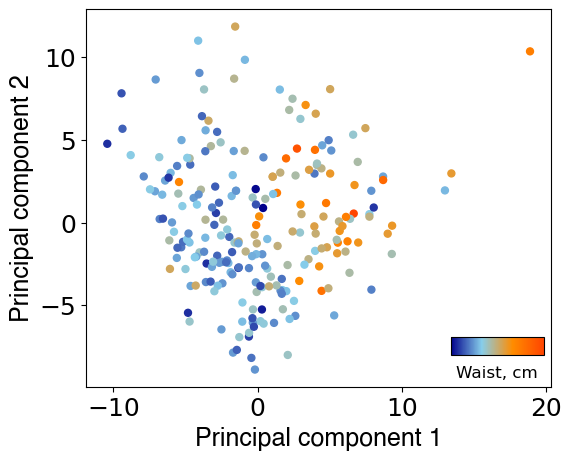

In [630]:
fig, ax = plt.subplots(figsize=[6, 7])

cmap = cmap_detailed

scatter = ax.scatter(components_nobmi[:,0], components_nobmi[:,1],
                     c=data_num['Waist_cm'], alpha=1, s=25, cmap=cmap,
                     #norm=colors.LogNorm(
                     #    vmin=data_num['Waist_cm'].min(), vmax=data_num['Waist_cm'].max()
                     #)
                    )

ax.grid(False)
ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
ax.tick_params(labelsize=18)

colorbar = fig.colorbar(scatter, ticks=[],
                        location='bottom',
                        anchor=(0.98, 3.1),
                        shrink=0.2, aspect=5)

colorbar.set_label('Waist, cm', loc='center', size=12)

if SAVE_FILES:
    plt.savefig('plots/behavioural_pca_cmap_detailed.svg')
plt.show()

### Clustering

#### Plotting functions

In [631]:
# Tweaking the code from the book to adjust the style

from matplotlib.colors import LogNorm

one_legend = True


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=60, linewidths=8,
                color=circle_color, zorder=10, alpha=0.5)
    x = 0
    y = 0
    centroids_text = centroids.copy() - 0.5
    for marker in [0, 1, 3, 8]:
        plt.text(centroids_text[x, 0], centroids_text[y, 1],
                 str(marker), fontsize=20,
                 color=cross_color,
                 zorder=11, alpha=1)
        x += 1
        y += 1
        
    if not one_legend:
        x = 0
        y = 0
        cluster_size_coordinates = np.array([[-10, -4.5],
                                             [9, -4.5],
                                             [-8, 10],
                                             [6, 10]])
        for cluster_size in [127, 34, 15, 52]:
            plt.text(cluster_size_coordinates[x, 0], cluster_size_coordinates[y, 1],
                     "N="+str(cluster_size), fontsize=15,
                     color=cross_color,
                     zorder=11, alpha=1)
            x += 1
            y += 1
    else:
        legend_coordinates = [12.5, -5]
        plt.text(legend_coordinates[0], legend_coordinates[1],
                 "0: N = 127\n1: N = 34\n3: N = 15\n8: N = 52", fontsize=11,
                 color=cross_color,
                 zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #plt.contourf(xx, yy, Z,
    #             norm=LogNorm(vmin=1.0, vmax=30.0),
    #             levels=np.logspace(0, 2, 12))
    #plt.contour(xx, yy, Z,
    #            norm=LogNorm(vmin=1.0, vmax=30.0),
    #            levels=np.logspace(0, 2, 12),
    #            linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=[6, 7])
    ax.contour(xx, yy, Z,
               linewidths=1, colors='black', linestyles='dashed')
    
    ax.scatter(X[:, 0], X[:, 1],
               c=data_num['Waist_cm'],
               alpha=1, s=25, cmap=cmap
              )
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
    if show_ylabels:
        ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
    else:
        ax.tick_params(labelleft=False)
    ax.tick_params(labelsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    colorbar = fig.colorbar(scatter, ticks=[],
                            location='bottom',
                            anchor=(0.97, 3.25),
                            shrink=0.2, aspect=5)
    colorbar.set_label('Waist, cm', loc='center', size=12)
    if SAVE_FILES:
        plt.savefig('plots/behavioural_clusters_cmap_detailed.svg')

#### Plot clustering

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_18678/707347950.py:84: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  colorbar = fig.colorbar(scatter, ticks=[],


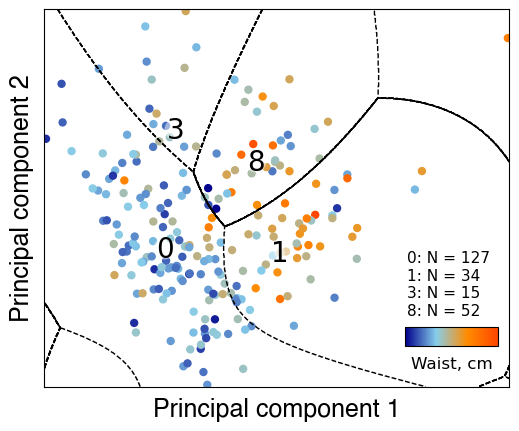

In [632]:
cmap = cmap_detailed
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 0, 3, 8, 1
plt.show()


In [635]:
bgm_cluster_on_pca_nobmi = bgm_on_pca_nobmi.predict(components_nobmi)
data_bgm_clustered_on_pca_nobmi = data_num.copy()
data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] = bgm_cluster_on_pca_nobmi
data_bgm_clustered_on_pca_nobmi.to_csv("processed_data/clustered_behavioral_LEMON_pca_based_nobmi.csv")

In [636]:
data_bgm_clustered_on_pca_nobmi.groupby('bgm_pca_cluster', as_index=False)['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI'].agg('mean')

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_18678/3214915997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_bgm_clustered_on_pca_nobmi.groupby('bgm_pca_cluster', as_index=False)['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI'].agg('mean')


,bgm_pca_cluster,FEV_KK,FEV_STOER,FEV_HUNGER,BMI
0,0,5.267717,5.338583,5.543307,23.108337
1,1,8.846154,4.153846,3.307692,26.232232
2,3,5.142857,5.500000,4.285714,23.455754
3,7,5.000000,5.000000,4.000000,28.801077
4,8,7.617647,3.735294,3.088235,25.557152


#### ANOVA analysis of BMI between clusters

In [637]:
BMI_clust_0 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 0]['BMI'])
BMI_clust_1 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 1]['BMI'])
BMI_clust_3 = np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 3]['BMI'])
BMI_clust_8= np.array(data_bgm_clustered_on_pca_nobmi[data_bgm_clustered_on_pca_nobmi['bgm_pca_cluster'] == 8]['BMI'])

from scipy.stats import f_oneway
f_oneway(BMI_clust_0, BMI_clust_1,
         BMI_clust_3, BMI_clust_8)

F_onewayResult(statistic=12.767456676580391, pvalue=9.906761284154145e-08)

In [638]:
from scipy.stats import tukey_hsd
bmi_hsd = tukey_hsd(BMI_clust_0, BMI_clust_1,
                    BMI_clust_3, BMI_clust_8)
pd.DataFrame(bmi_hsd.pvalue, columns=[0, 1, 3, 8], index=[0, 1, 3, 8])

,0,1,3,8
0,1.000000e+00,3.369872e-07,0.983274,0.001249
1,3.369872e-07,1.000000e+00,0.034137,0.801259
3,9.832739e-01,3.413731e-02,1.000000,0.206278
8,1.249491e-03,8.012595e-01,0.206278,1.000000
